# Volrath (2009) "How important are dual economy effects..."

>Vollrath, D., 2009. How important are dual economy effects for aggregate productivity? *Journal of Development Economics* 88, 325–334.


How can we explain the inverse relationship between the share of labor in the agricultural sector and GDP per capita.

<img src="./media/income_ag.png" alt="Vollrath" class="bg-primary" width="500px">

## Efficient allocation explanation

### GDP per capita

This isn't exactlyt same model (his has mobile capital across sectors), it's a slightly simpler Specific-Factors (or Ricardo Viner) model with specific capital in the manufacturing and agricultural sector (i.e. land) to show very similar diagrams. It helps make the same points.

Production in the ag and manufacturing (Volrath calls it 'industrial') sectors respectively are given by:

$$
A_A \cdot T_a ^\alpha  L_a^{1-\alpha}
$$

$$
A_M \cdot K_m ^\beta L_m^{1-\beta}
$$

Economywide labor supply must in equilibrium be allocated across the sectors:

$$
L_a + L_m = \bar L
$$

Divide by $\bar L$ to express in per capita terms:

$$
l_a + l_m = 1
$$

Land is specific to the ag sector and in fixed supply so $T_a=\bar T$, and capital is specific to manufacturing and fixed $K_m = \bar K$

Note that ag output per capita can be written:

$$
\frac{A_A \cdot \bar T^\alpha \cdot L_a^{1-\alpha}}{\bar L}  = A_A \bar t ^\alpha  \cdot l_a ^{1-\alpha}
$$

where $\bar t = \bar T / \bar L$

And a similar expression for manuf output per capita.

Let's define $A_a = A_A \bar t^\alpha$  so a country with high 'TFP' has either better technology (higher $A_A$) and/or a higher endowment of land per person. 

Similarly, define $A_m = A_M \bar k^\beta$.

Then we can express GDP per capita measured in agricultural goods as given by 

$$
y(l_a| A_a, A_m, p) = A_a l_a^\alpha  + p \cdot A_m (1-l_a)^\beta
$$

Where $p=\frac{P_A}{P_M}$ is the relative price of agricultural goods. 

### Rich and Poor Countries

Technology (and/or endowments of capital and land per person) are different between **rich** and **poor** countries

|      | Agriculture | Industry  |
| ---- | :---------: | :-------: |
| Rich |  $A_{aR}$  | $A_{mR}$ |
| Poor |  $A_{aP}$  | $A_{mP}$ |


The Rich country might have absolute productivity advantages but the poor countries have a comparative advantage in agriculture.  We could also allow for different $\alpha$ and $\beta$ but we ignore that here.

$$
y_R(l_a| A_{aR}, A_{mR}, p) = A_{aR} l_a^\alpha  + p \cdot A_{mR} (1-l_a)^\beta
$$

$$
y_P(l_a| A_{aP}, A_{mP}, p) = A_{aP} l_a^\alpha  + p \cdot A_{mP} (1-l_a)^\beta
$$


Perhaps poorer countries just have a comparative advantage at agricultural production.  

Let's plot this per capita GDP function and see how its shape changes with the value of the $A$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
from scipy.optimize import fsolve, brentq, minimize

In [2]:
def F(la, A, alpha):
    return  A * la**alpha

def  y(la= 0.5, Aa = 1, Am = 1, alpA = 0.5, alpM = 0.5, p = 1):
    '''GDP per capita'''
    return  F(la, Aa, alpA) + p * F(1-la, Am, alpM)


def optla(Aa = 1, Am = 1, alpA = 0.5, alpM = 0.5, p = 1):   
    '''We could solve these FOC analytically for the optimal labor share, 
       but here we solve for root numerically'''
    def foc(la):
        return alpA * Aa * la**(alpA-1) - p* alpM * Am * (1-la)**(alpM-1)  
    return fsolve(foc, 0.05)[0]

def plot_y(Aa = 1, Am = 1, alpA = 0.5, alpM = 0.5, p = 1, ax=None):
    if ax is None:
        ax = plt.gca()
    lla = np.linspace(0,1, 100)
    ax.plot(lla, y(lla, Aa, Am, alpA, alpM, p), label =r'$y(l_A | A_A, A_I )$')
    lao = optla(Aa, Am, alpA, alpM, p = 1)
    ax.scatter(lao, y(lao, Aa, Am, alpA, alpM, p) )
    ax.set_xlim(-0.01, 1.01)
    ax.axvline(lao, linestyle='dashed')
    ax.set_xlabel(r'$l_a$ -- pct labor in agriculture')
    ax.set_ylabel(r'$y$ -- gdp per capita')
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    ax.grid()
    print(f'{lao*100:0.0f}% ag employment, y = {y(lao, Aa, Am, alpA, alpM, p):0.0f}')
    

def plot_ppf(Aa = 1, Am = 1, alpA = 0.5, alpM = 0.5, p = 1, ax=None):
    '''draw PPF and world price line through optimum'''
    if ax is None:
        ax = plt.gca()
    lla = np.linspace(0.001, 0.999, 50)    
    ax.plot(F(lla, Aa, alpA), F(1-lla, Am, alpM) ) 
    lao = optla(Aa, Am, alpA, alpM, p = 1)
    ax.scatter(F(lao, Aa, alpA), F(1-lao, Am, alpM) ) 
    xo, yo = F(lao, Aa, alpA), F(1-lao, Am, alpM)
    A = yo + p*xo
    ax.plot([0, A/p], [A, 0], alpha = 0.5)  # price line
    ax.set_xlim(left=0.)
    ax.set_ylim(bottom=0.)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid()
        

In [3]:
AaR, AmR  = 4, 10
AaP, AmP  = 2, 1



|      | Agriculture | Industry  |
| ---- | :---------: | :-------: |
| Rich |  $A_{aR}$=4  | $A_{mR}$=10|
| Poor |  $A_{aP}$=2  | $A_{mP}$=1 |

The Rich country has 'TFP' twice as high as the poor country in agriculture.
The Rich country has 'TFP' ten times higher in manufacturing.

Rich has a comparative advantage in manufacturing


**Rich country**
GDP per capita is maximized at a low share of employment in agriculture.

8% ag employment, y = 11


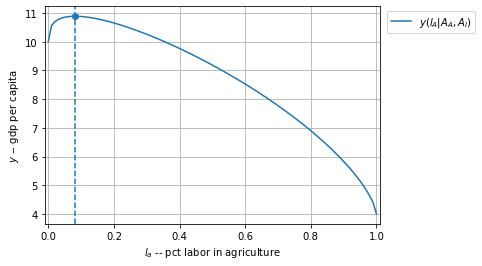

In [4]:
plot_y(Aa= 4, Am = 10, alpA = 0.4, alpM = 0.7)

**Poor country**

GDP per capita is maximized at a high share of employment in agriculture.  Note lower level of GDP per capita than rich.

88% ag employment, y = 2


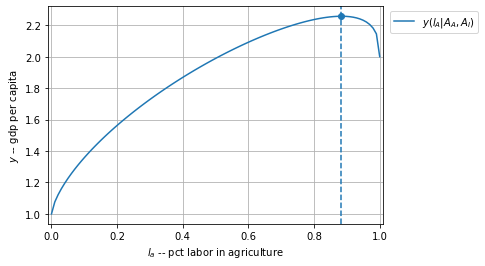

In [5]:
plot_y(Aa=2, Am=1, alpA = 0.7, alpM = 0.4)

**Rich and Poor plotted together**

Demonstrating how that the inverse relationship between labor-share in agriculture and GDP per capita might be generated, with efficient allocations.


8% ag employment, y = 11
88% ag employment, y = 2


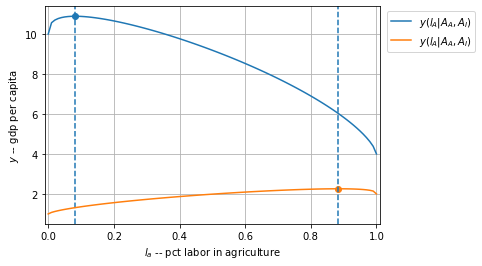

In [6]:
fig, ax = plt.subplots()
plot_y(Aa=4, Am=10, alpA = 0.4, alpM = 0.7)
plot_y(Aa=2, Am=1, alpA = 0.7, alpM = 0.4)
ax.grid()

### PPFs
Just for fun, let's draw their PPFs. We assume here they both face the same world relative price $p$

This is really just a trade model with comparative advantage (the shape of the PPF) determined my a combination of relative factor endowments and the technological productivity levels.

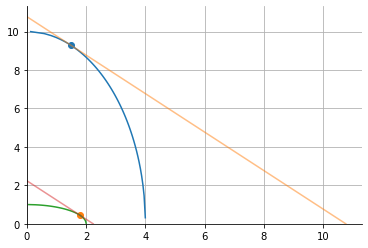

In [7]:
plot_ppf(Aa = AaR, Am = AmR, alpA = 0.5, alpM = 0.5)
plot_ppf(Aa = AaP, Am = AmP, alpA = 0.5, alpM = 0.5)
plt.grid()

In [8]:
interact(Aa=(1,5,0.1), Am=(1,5,0.1), alpA = (0.2, 0.8, 0.1), alpM = (0.2, 0.8, 0.1))